## K-means Algorithm

In [1]:
##Code Implementaion

In [2]:
import pandas as pd

from sklearn.cluster import KMeans   # <-- Add this line
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("iris.csv", index_col="Id")
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = data.drop("Species",axis =1).to_numpy()

In [5]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [6]:
kmeans_model = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=99)

In [7]:


kmeans_model.fit(x_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,200
,tol,0.0001
,verbose,0
,random_state,99
,copy_x,True
,algorithm,'lloyd'


In [8]:
kmeans_model.cluster_centers_

array([[ 1.16743407,  0.15377779,  1.00314548,  1.02963256],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.01139555, -0.87288504,  0.37688422,  0.31165355]])

In [9]:
kmeans_model.inertia_

141.15417813388652

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

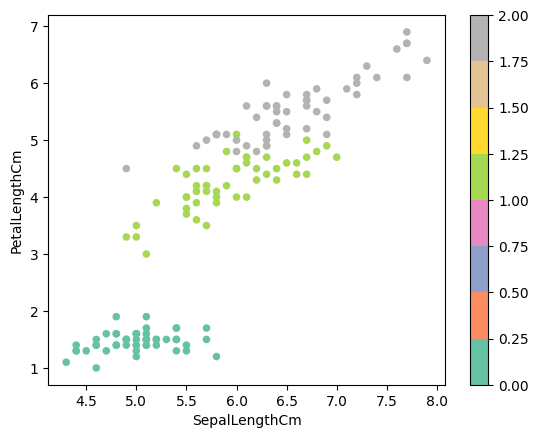

In [10]:
t,_ = pd.factorize(data.Species)
data.plot.scatter(x='SepalLengthCm', y='PetalLengthCm', c=t, cmap="Set2")

In [16]:
kl = kmeans_model.labels_



In [11]:
from sklearn.metrics import silhouette_score

silhouette_score(x_scaled,kmeans_model.labels_)

0.46214947389312017

In [12]:
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [13]:
from sklearn.metrics import jaccard_score,rand_score,mutual_info_score,normalized_mutual_info_score

In [17]:
jaccard_score(t, kl, average="weighted")

0.06367041198501872

In [18]:
rand_score(t, kl)

0.8195973154362416

In [20]:
mutual_info_score(t, kl)

0.7044862220255494

In [21]:
normalized_mutual_info_score(t, kl)

0.6426583176523605